In [30]:
library('plm')

In [31]:
df_ihh  <-  read.csv(file="raw_full.csv", header=TRUE, sep=",")

In [32]:
df_ihh[is.na(df_ihh)] <- 0

In [33]:
# df_ihh$merge_index  <- NULL

In [34]:
df_ihh[df_ihh$otrasl == 'IT', c('gini', 'MA')] 

,gini,MA
1,0.5651205,34351.51
19,0.5623652,51898.21
37,0.5741356,109740.54
55,0.5972849,307476.86
72,0.6078223,46197.60


In [35]:
library(ggplot2)

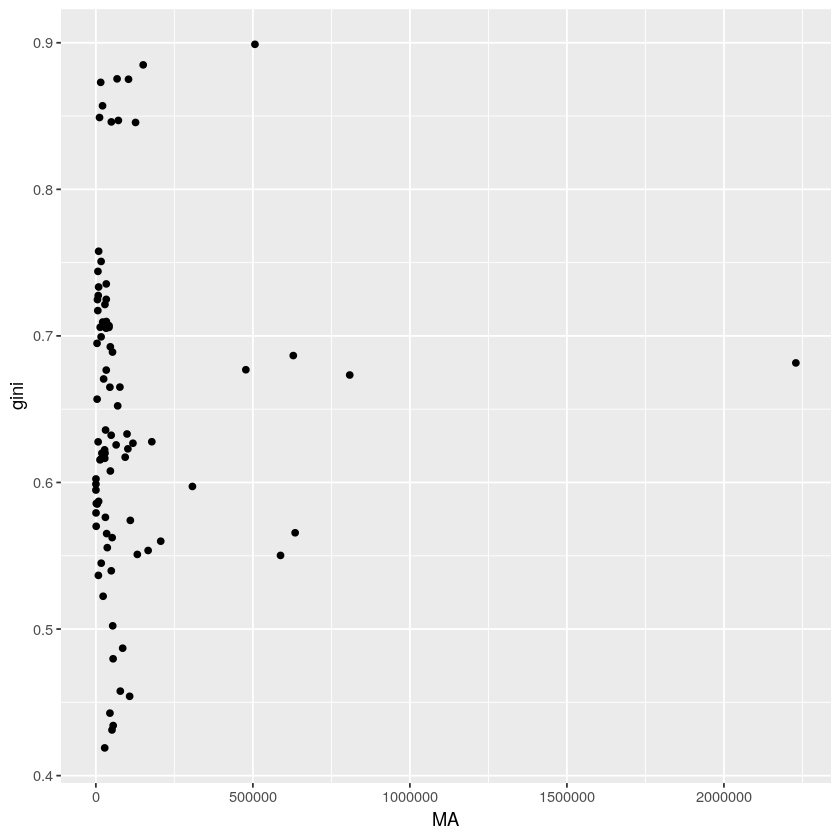

In [36]:
# yhat <- ols$fitted
ggplot(df_ihh, aes(x = MA, y = gini))+
  geom_point() 

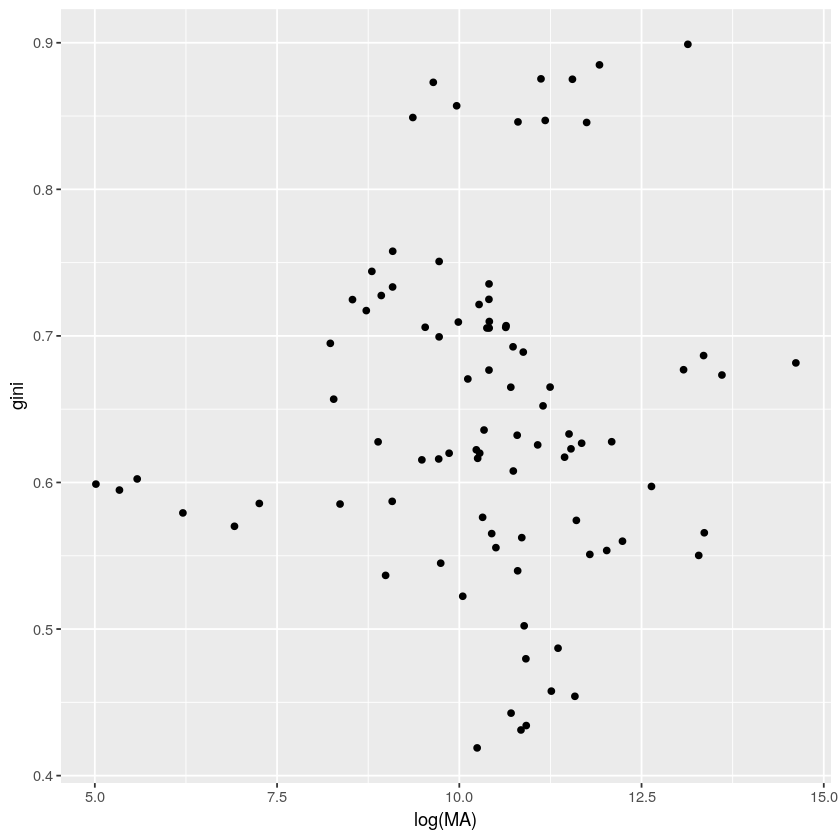

In [37]:
# yhat <- ols$fitted
ggplot(df_ihh, aes(x = log(MA), y = gini))+
  geom_point() 

In [38]:
df_ihh$value_inout  <-  NULL 
df_ihh$value_in  <-  NULL 
df_ihh$value_outin  <-  NULL 

In [39]:
df_ihh = pdata.frame(df_ihh, index = c('otrasl','year'))

In [40]:
df_ihh$real_prices[df_ihh$real_prices == 0] <- NA

In [41]:
df_ihh['log_ihh'] = log(df_ihh$IHH)
df_ihh['ma_lag'] = lag(df_ihh$MA, 1)
df_ihh['ma_log'] = log(df_ihh$MA)
df_ihh['ma_log_lag'] = lag(df_ihh$ma_log, 1)

In [42]:
# df_lag = lag(df_ihh$MA, 1)

In [43]:
# df_ihh_part = df_ihh[df_ihh$otrasl != 'IT', ] 
df_ihh_part = df_ihh

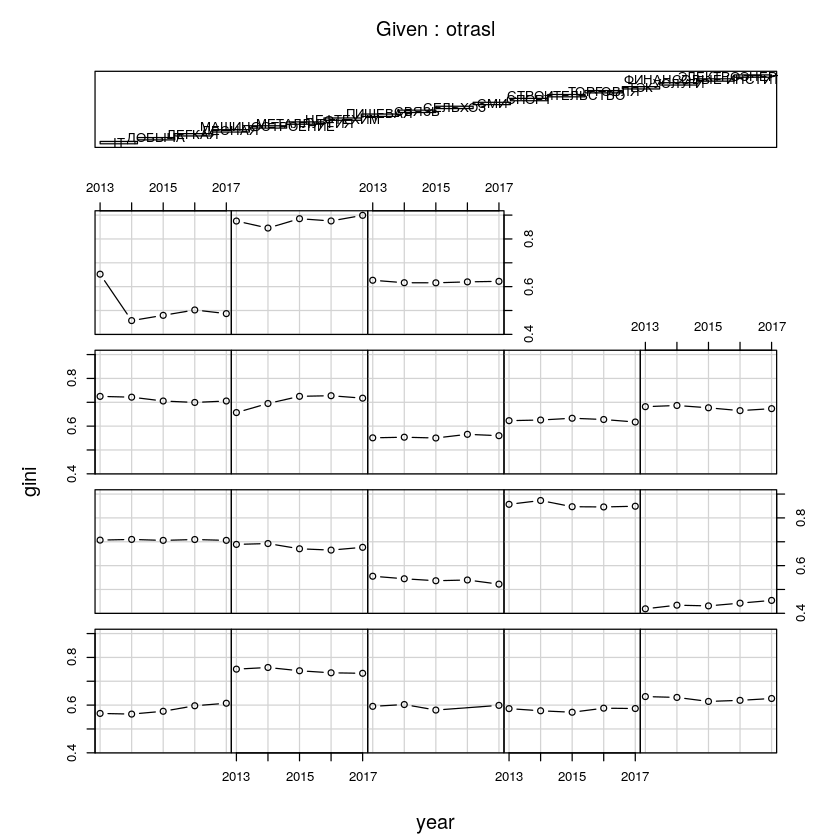

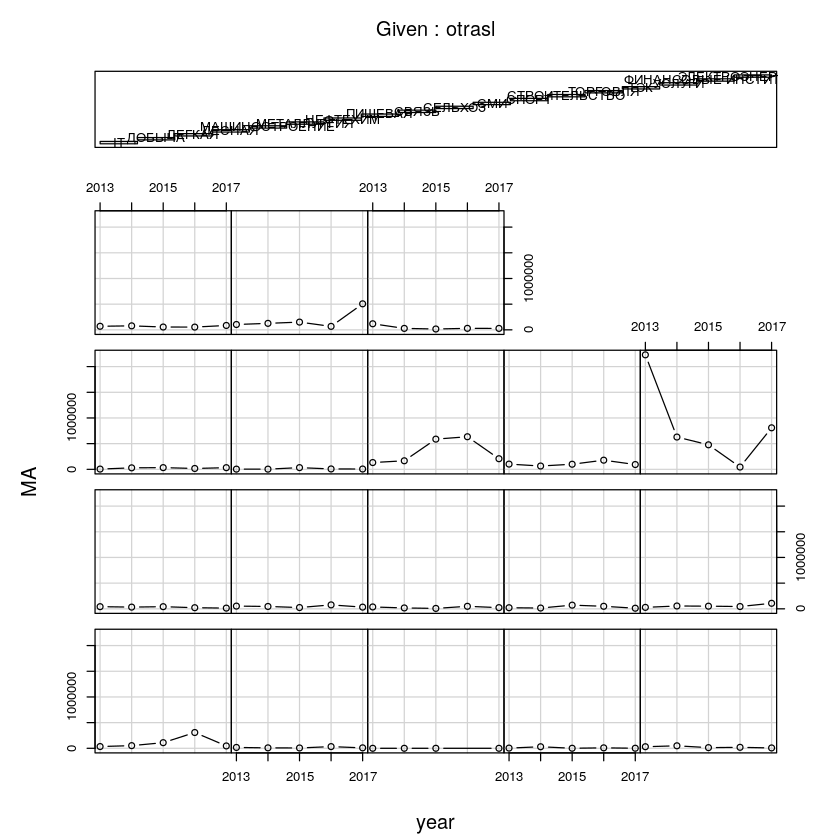

In [44]:
coplot(gini ~ year|otrasl, type="b", data=df_ihh_part)
coplot(MA ~ year|otrasl, type="b", data=df_ihh_part)

In [45]:
library(gplots)

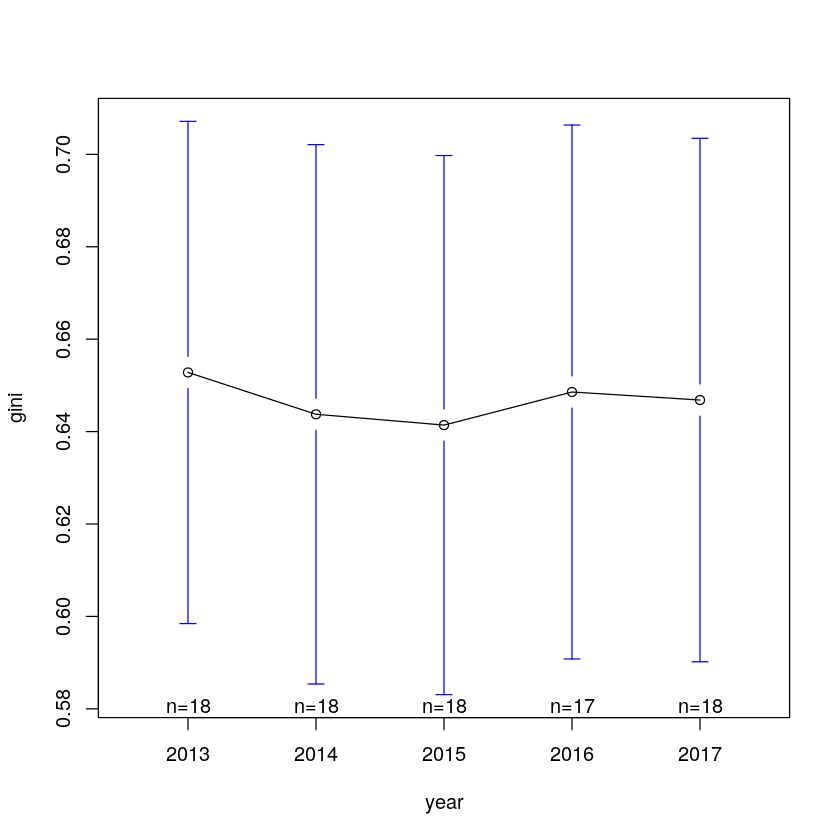

In [46]:
plotmeans(gini ~ year, data = df_ihh_part)
# plotmeans(gini ~ otrasl, data = df_ihh)

In [49]:
ols <-lm(gini~ma_log+ma_log_lag+log(real_prices)+real_gdp_change, data = df_ihh)
summary(ols)


Call:
lm(formula = gini ~ ma_log + ma_log_lag + log(real_prices) + 
    real_gdp_change, data = df_ihh)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21326 -0.07143 -0.01948  0.06322  0.24940 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.473e-01  1.019e-01   6.355 2.35e-08 ***
ma_log           -2.857e-03  3.708e-02  -0.077    0.939    
ma_log_lag       -8.509e-04  1.330e-02  -0.064    0.949    
log(real_prices)  3.604e-03  3.675e-02   0.098    0.922    
real_gdp_change   2.217e-06  1.177e-05   0.188    0.851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1169 on 65 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.0008473,	Adjusted R-squared:  -0.06064 
F-statistic: 0.01378 on 4 and 65 DF,  p-value: 0.9996


In [50]:
library(ggplot2)

In [51]:
dim(df_ihh)

[1] 89 18

In [52]:
fixed.dum <-lm(gini~ma_log+ma_log_lag+log(real_prices)+log(real_prices)+real_gdp_change+ factor(otrasl) - 1, data = df_ihh)
summary(fixed.dum)


Call:
lm(formula = gini ~ ma_log + ma_log_lag + log(real_prices) + 
    log(real_prices) + real_gdp_change + factor(otrasl) - 1, 
    data = df_ihh)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0302974 -0.0053344  0.0005272  0.0064697  0.0213279 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
ma_log                              4.604e-03  4.205e-03   1.095    0.279    
ma_log_lag                          1.654e-03  2.179e-03   0.759    0.452    
log(real_prices)                   -1.573e-03  3.925e-03  -0.401    0.690    
real_gdp_change                     1.628e-06  1.245e-06   1.307    0.197    
factor(otrasl)IT                    5.315e-01  4.093e-02  12.988  < 2e-16 ***
factor(otrasl)ДОБЫЧА                6.983e-01  3.392e-02  20.584  < 2e-16 ***
factor(otrasl)ЛЕГКАЯ                5.650e-01  2.197e-02  25.722  < 2e-16 ***
factor(otrasl)ЛЕСНАЯ                5.397e-01  3.081e-02  17.517  < 2e-16 ***
factor(ot

In [53]:
library(car)  

Warning message in scatterplot.default(X[, 2], X[, 1], groups = X[, 3], xlab = xlab, :
“number of groups exceeds number of available colors
  colors are recycled”

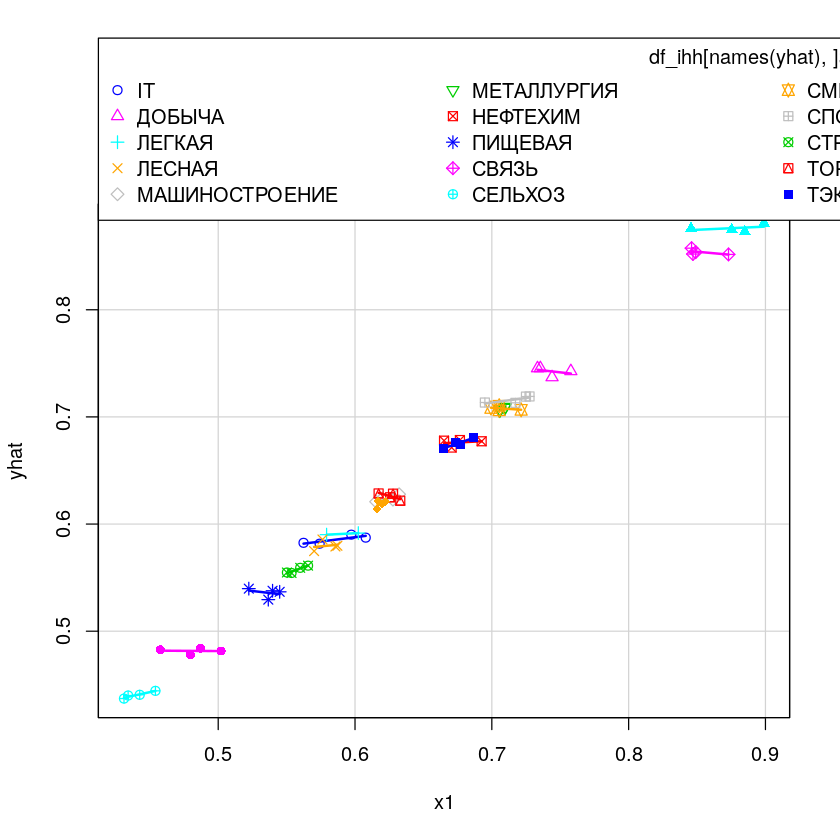

In [54]:
yhat <- fixed.dum$fitted
scatterplot(yhat ~ df_ihh[names(yhat),]$gini | df_ihh[names(yhat),]$otrasl,  xlab ="x1", ylab ="yhat", boxplots = FALSE,smooth = FALSE)
abline(lm(df_ihh$ma_log~df_ihh$gini),lwd=3, col="red")

In [55]:
fixed <- plm(gini~ma_log+ma_log_lag+log(real_prices)+ real_gdp_change, data = df_ihh_part, model="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = gini ~ ma_log + ma_log_lag + log(real_prices) + 
    real_gdp_change, data = df_ihh_part, model = "within")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.03029736 -0.00533438  0.00052722  0.00646973  0.02132787 

Coefficients:
                    Estimate  Std. Error t-value Pr(>|t|)
ma_log            4.6044e-03  4.2052e-03  1.0949   0.2790
ma_log_lag        1.6537e-03  2.1787e-03  0.7590   0.4516
log(real_prices) -1.5729e-03  3.9248e-03 -0.4008   0.6904
real_gdp_change   1.6275e-06  1.2450e-06  1.3073   0.1974

Total Sum of Squares:    0.0078622
Residual Sum of Squares: 0.0072784
R-Squared:      0.074256
Adj. R-Squared: -0.33076
F-statistic: 0.962549 on 4 and 48 DF, p-value: 0.43668

In [56]:
fixef(fixed)

IT               ДОБЫЧА               ЛЕГКАЯ 
           0.5315246            0.6983030            0.5650206 
              ЛЕСНАЯ       МАШИНОСТРОЕНИЕ          МЕТАЛЛУРГИЯ 
           0.5396936            0.5772160            0.6594591 
            НЕФТЕХИМ              ПИЩЕВАЯ                СВЯЗЬ 
           0.6259389            0.4890531            0.8051834 
             СЕЛЬХОЗ                  СМИ                СПОРТ 
           0.3891467            0.6605659            0.6739217 
       СТРОИТЕЛЬСТВО             ТОРГОВЛЯ                  ТЭК 
           0.4976091            0.5715883            0.6152977 
              УСЛУГИ ФИНАНСОВЫЕ ИНСТИТУТЫ    ЭЛЕКТРОЭНЕРГЕТИКА 
           0.4293633            0.8204260            0.5703716

In [57]:
pFtest(fixed, ols)


	F test for individual effects

data:  gini ~ ma_log + ma_log_lag + log(real_prices) + real_gdp_change
F = 341.77, df1 = 17, df2 = 48, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 0.05 выбираем fe model 

In [58]:
random <- plm(gini~ma_log+ma_log_lag+log(real_prices)+real_gdp_change, data = df_ihh_part, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = gini ~ ma_log + ma_log_lag + log(real_prices) + 
    real_gdp_change, data = df_ihh_part, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                    var   std.dev share
idiosyncratic 0.0001516 0.0123139 0.009
individual    0.0163994 0.1280601 0.991
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9322  0.9520  0.9520  0.9514  0.9520  0.9520 

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.033052 -0.006272 -0.000015  0.000025  0.004940  0.031353 

Coefficients:
                    Estimate  Std. Error z-value Pr(>|z|)    
(Intercept)       5.9635e-01  4.5740e-02 13.0379   <2e-16 ***
ma_log            4.5574e-03  4.0809e-03  1.1168   0.2641    
ma_log_lag        1.6163e-03  2.0968e-03  0.7708   0.4408    
log(real_prices) -1.5665e-03  3.8168e-03 -0.4104   0.6815    
real_gdp_change   1.6295e-06  1.2109e-06  1.3457   0

In [59]:
phtest(fixed, random)


	Hausman Test

data:  gini ~ ma_log + ma_log_lag + log(real_prices) + real_gdp_change
chisq = 0.0059834, df = 4, p-value = 1
alternative hypothesis: one model is inconsistent


p-value < 0.5 используем  FE модель

In [60]:
fixed.time <- plm(gini~ma_log+ma_log_lag+log(real_prices)+real_gdp_change + factor(year), data=df_ihh_part, model="within")
summary(fixed.time)

Oneway (individual) effect Within Model

Call:
plm(formula = gini ~ ma_log + ma_log_lag + log(real_prices) + 
    real_gdp_change + factor(year), data = df_ihh_part, model = "within")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.0292582 -0.0054550  0.0006105  0.0065755  0.0223642 

Coefficients: (1 dropped because of singularities)
                    Estimate  Std. Error t-value Pr(>|t|)
ma_log            4.5593e-03  4.3153e-03  1.0565   0.2962
ma_log_lag        1.6051e-03  2.2249e-03  0.7214   0.4743
log(real_prices) -1.4827e-03  4.0137e-03 -0.3694   0.7135
real_gdp_change   3.8119e-06  5.3199e-06  0.7165   0.4773
factor(year)2015  6.4595e-03  1.5173e-02  0.4257   0.6723
factor(year)2016  9.3558e-04  4.0914e-03  0.2287   0.8201

Total Sum of Squares:    0.0078622
Residual Sum of Squares: 0.0072496
R-Squared:      0.077918
Adj. R-Squared: -0.38312
F-statistic: 0.647854 on 6 and 46 DF, p-value: 0.69149

In [61]:
pFtest(fixed.time, fixed)


	F test for individual effects

data:  gini ~ ma_log + ma_log_lag + log(real_prices) + real_gdp_change +  ...
F = 0.091349, df1 = 2, df2 = 46, p-value = 0.9129
alternative hypothesis: significant effects


In [62]:
plmtest(fixed, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan) for unbalanced
	panels

data:  gini ~ ma_log + ma_log_lag + log(real_prices) + real_gdp_change
chisq = 2.0975, df = 1, p-value = 0.1475
alternative hypothesis: significant effects


нет фиксированных временных эффектов

In [63]:
pool <- plm(gini~ma_log+ma_log_lag+log(real_prices)+real_gdp_change, data = df_ihh_part, model="pooling")
summary(pool)

Pooling Model

Call:
plm(formula = gini ~ ma_log + ma_log_lag + log(real_prices) + 
    real_gdp_change, data = df_ihh_part, model = "pooling")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-0.213258 -0.071435 -0.019485  0.063216  0.249395 

Coefficients:
                    Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)       6.4733e-01  1.0187e-01  6.3547 2.354e-08 ***
ma_log           -2.8572e-03  3.7082e-02 -0.0771    0.9388    
ma_log_lag       -8.5091e-04  1.3301e-02 -0.0640    0.9492    
log(real_prices)  3.6036e-03  3.6745e-02  0.0981    0.9222    
real_gdp_change   2.2171e-06  1.1769e-05  0.1884    0.8512    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    0.88903
Residual Sum of Squares: 0.88828
R-Squared:      0.00084726
Adj. R-Squared: -0.060639
F-statistic: 0.0137796 on 4 and 65 DF, p-value: 0.99962

In [64]:
plmtest(pool, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  gini ~ ma_log + ma_log_lag + log(real_prices) + real_gdp_change
chisq = 103.57, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 2.2e-16  используем re модель

In [65]:
# pcdtest(fixed, test = c("lm"))

In [66]:
pcdtest(fixed, test = c("cd"))


	Pesaran CD test for cross-sectional dependence in panels

data:  gini ~ ma_log + ma_log_lag + log(real_prices) + real_gdp_change
z = -1.0048, p-value = 0.315
alternative hypothesis: cross-sectional dependence


p-value > 0.05 нет кросс-секциональной зависимости

In [67]:
pbgtest(fixed)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  gini ~ ma_log + ma_log_lag + log(real_prices) + real_gdp_change
chisq = 5.5617, df = 2, p-value = 0.06198
alternative hypothesis: serial correlation in idiosyncratic errors


Есть серийная корреляция

In [68]:
library(tseries)  

In [69]:
adf.test(df_ihh$gini, k=2)

Warning message in adf.test(df_ihh$gini, k = 2):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  df_ihh$gini
Dickey-Fuller = -5.2838, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


p-value < 0.05 ряды не имеют единичного корня

In [70]:
library(lmtest) 

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [71]:
bptest(gini~ma_log+ma_log_lag+log(real_prices), data = df_ihh_part, studentize=F)


	Breusch-Pagan test

data:  gini ~ ma_log + ma_log_lag + log(real_prices)
BP = 2.6907, df = 3, p-value = 0.4418


Есть гетероскдастичность, необходимо использовать устойчивые к гетероскедастичности оценки ковариационной матрицы 

In [72]:
coeftest(fixed) 

coeftest(fixed, vcovHC) 

coeftest(fixed, vcovHC(fixed, type = "HC2")) 


t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)
ma_log            4.6044e-03  4.2052e-03  1.0949   0.2790
ma_log_lag        1.6537e-03  2.1787e-03  0.7590   0.4516
log(real_prices) -1.5729e-03  3.9248e-03 -0.4008   0.6904
real_gdp_change   1.6275e-06  1.2450e-06  1.3073   0.1974



t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)  
ma_log            4.6044e-03  2.1925e-03  2.1001  0.04100 *
ma_log_lag        1.6537e-03  2.3921e-03  0.6913  0.49270  
log(real_prices) -1.5729e-03  1.0497e-03 -1.4984  0.14058  
real_gdp_change   1.6275e-06  8.4105e-07  1.9351  0.05888 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)  
ma_log            4.6044e-03  2.2177e-03  2.0762  0.04325 *
ma_log_lag        1.6537e-03  2.4610e-03  0.6719  0.50484  
log(real_prices) -1.5729e-03  1.1398e-03 -1.3800  0.17398  
real_gdp_change   1.6275e-06  8.6644e-07  1.8784  0.06640 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [73]:
coeftest(random) 
coeftest(random, vcovHC) 
coeftest(random, vcovHC(fixed, type = "HC1")) 
# coeftest(random, vcovHC(fixed, type = "HC2")) 
# coeftest(random, vcovHC(fixed, type = "HC3")) 


t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)    
(Intercept)       5.9635e-01  4.5740e-02 13.0379   <2e-16 ***
ma_log            4.5574e-03  4.0809e-03  1.1168   0.2682    
ma_log_lag        1.6163e-03  2.0968e-03  0.7708   0.4436    
log(real_prices) -1.5665e-03  3.8168e-03 -0.4104   0.6828    
real_gdp_change   1.6295e-06  1.2109e-06  1.3457   0.1831    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)    
(Intercept)       5.9635e-01  4.7792e-02 12.4779  < 2e-16 ***
ma_log            4.5574e-03  2.1629e-03  2.1071  0.03897 *  
ma_log_lag        1.6163e-03  2.3062e-03  0.7008  0.48590    
log(real_prices) -1.5665e-03  1.0509e-03 -1.4906  0.14090    
real_gdp_change   1.6295e-06  8.4009e-07  1.9397  0.05676 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)  
ma_log            4.5574e-03  2.2579e-03  2.0184  0.04768 *
ma_log_lag        1.6163e-03  2.4635e-03  0.6561  0.51408  
log(real_prices) -1.5665e-03  1.0810e-03 -1.4491  0.15212  
real_gdp_change   1.6295e-06  8.6617e-07  1.8813  0.06441 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


HC3 – Recommended for small samples. HC3 gives less weight to influential observations.